In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('Height-Weight Data.csv')

In [3]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [6]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [7]:
df.Height.mean()

69.02441087268797

In [8]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [9]:
df.Height.std()

2.8585833281420983

In [10]:
df.shape

(3501, 2)

# Vizualization

Text(0.5, 1.0, 'Height-Weight Data')

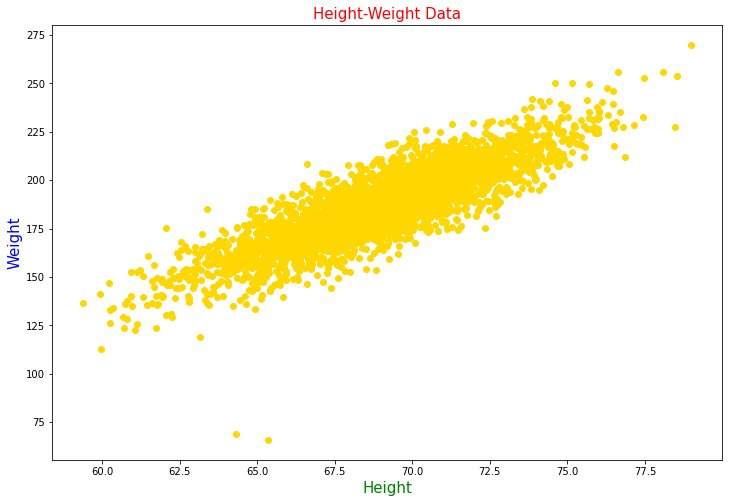

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height,df.Weight,color='gold')
plt.xlabel('Height',color='green',size='15')
plt.ylabel('Weight',color='blue',size='15')
plt.title('Height-Weight Data',color='red',size='15')

In [12]:
 df.drop('Height',axis=1) 

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
3496,185.649086
3497,210.198845
3498,202.429960
3499,144.277671


In [13]:
 x=df[['Height']]
 y=df['Weight']   

In [14]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [15]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# split the dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split as tts

In [17]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.30)

In [18]:
xtrain.head()

,Height
3313,70.951030
1830,66.534352
1253,68.795383
1620,68.115672
1972,67.784538


In [19]:
ytrain.head()

3313    196.699671
1830    176.189279
1253    187.050906
1620    167.880720
1972    198.311756
Name: Weight, dtype: float64

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [21]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [22]:
m=reg.coef_
m

array([5.93121081])

In [23]:
c=reg.intercept_
c

-222.51093817923478

In [24]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [25]:
x1=73.730978
y=m*x1+c
y

array([214.80303528])

In [26]:
import warnings
warnings.filterwarnings('ignore')
reg.predict([[73.847017]])

array([215.49128705])

In [27]:
predict=reg.predict(xtest)
predict

array([201.73798974, 153.11991734, 183.823335  , ..., 150.69240502,
       177.11254809, 155.6870812 ])

In [28]:
df['predicted Weight']= reg.predict(x)


In [29]:
df.head()

,Height,Weight,predicted Weight
0,73.847017,241.893563,215.491287
1,68.781904,162.310473,185.449034
2,74.110105,212.740856,217.051720
3,71.730978,220.042470,202.940616
4,69.881796,206.349801,191.972725


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
mse=mean_squared_error(ytest,predict)

In [32]:
mse

109.53780894171368

In [33]:
mae=mean_absolute_error(ytest,predict)

In [34]:
mae

8.183786116817053

# Best fit Line

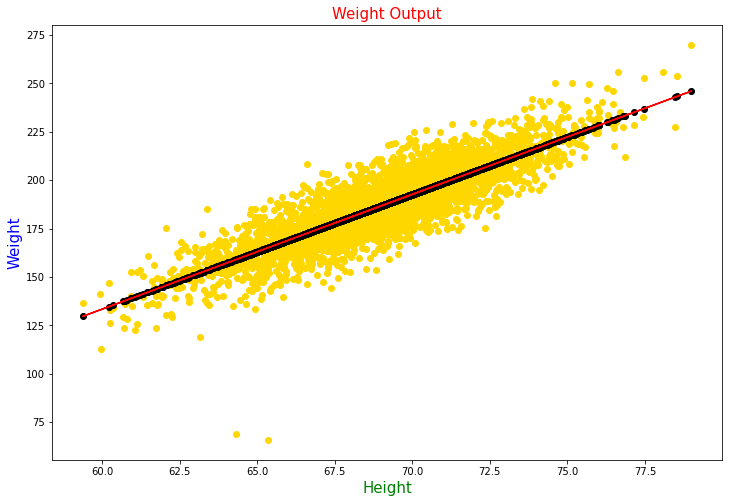

In [35]:
plt.figure(figsize=(12,8))

plt.xlabel('Height',color='green',size='15')
plt.ylabel('Weight',color='blue',size='15')
plt.plot(xtrain.squeeze(),reg.predict(xtrain),color='red')
plt.title('Weight Output',color='red',size='15')
plt.scatter(df.Height,df.Weight,color='gold')
plt.scatter(xtrain,reg.predict(xtrain),color='black')